In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

In [2]:
master_df= pd.read_csv('Data/train.csv')
master_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(master_df.dtypes,'\n')
print(master_df.isna().sum())

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


The dataset does have some missing values. Retrieve column names for the missing values in features along with the number of missing values

In [4]:
import DataClean as dc

In [5]:
missing= dc.missingData(master_df)

In [6]:
missing

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

Calculating percent of missing data

There are features which have almost 90% of their data missing. I am going to drop those features from the dataset. Others will be attended to as per there dtype

In [7]:
missingPercent= dc.missingPercent(master_df)

In [8]:
missingPercent

{'LotFrontage': 17.73972602739726,
 'Alley': 93.76712328767123,
 'MasVnrType': 0.547945205479452,
 'MasVnrArea': 0.547945205479452,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtFinType2': 2.6027397260273974,
 'Electrical': 0.0684931506849315,
 'FireplaceQu': 47.26027397260274,
 'GarageType': 5.5479452054794525,
 'GarageYrBlt': 5.5479452054794525,
 'GarageFinish': 5.5479452054794525,
 'GarageQual': 5.5479452054794525,
 'GarageCond': 5.5479452054794525,
 'PoolQC': 99.52054794520548,
 'Fence': 80.75342465753424,
 'MiscFeature': 96.30136986301369}

In [9]:
df, missingVals= dc.dropFeatures(master_df, 80.00)

In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [12]:
missingVals

{'LotFrontage': 17.73972602739726,
 'MasVnrType': 0.547945205479452,
 'MasVnrArea': 0.547945205479452,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtFinType2': 2.6027397260273974,
 'Electrical': 0.0684931506849315,
 'FireplaceQu': 47.26027397260274,
 'GarageType': 5.5479452054794525,
 'GarageYrBlt': 5.5479452054794525,
 'GarageFinish': 5.5479452054794525,
 'GarageQual': 5.5479452054794525,
 'GarageCond': 5.5479452054794525}

In [16]:
cols= missingVals.keys()
missing_Obj= df[cols].select_dtypes(include= 'object')
missing_Obj.columns

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [17]:
missing_Num= df[cols].select_dtypes(include= 'float')

In [18]:
df[missing_Num.columns]= df[missing_Num.columns].fillna(df[missing_Num.columns].mean())

In [19]:
df[missing_Obj.columns]= df[missing_Obj.columns].fillna('NONE')

In [20]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [21]:
obj_Features= df.select_dtypes(include= 'object').columns
df= pd.get_dummies(df,columns= obj_Features)

In [22]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [23]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

In [24]:
features= df.drop('SalePrice', axis= 1)
target= df['SalePrice']

In [25]:
features= scaler.fit_transform(features)

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
features= pd.DataFrame(features, columns= df.drop('SalePrice', axis=1).columns)

In [29]:
features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [194]:
from sklearn.decomposition import PCA

pca= PCA(n_components= 7)

In [195]:
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [196]:
reduced_features= pca.transform(features)

In [197]:
cols= ['feature'+str(i) for i in range(reduced_features.shape[1])]

In [198]:
reduced_features= pd.DataFrame(reduced_features, columns= cols)

In [199]:
reduced_features.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6
0,4.092914,1.737899,-0.906734,-2.388069,-1.142627,1.821216,-1.210517
1,0.168883,-3.275757,0.138098,-0.526493,0.763117,0.618031,-0.473880
2,4.924881,1.059270,-0.407069,-1.484213,-1.169566,2.552551,-1.826648
3,-1.537536,0.017390,-1.182593,2.537173,-2.441060,-0.286565,-0.774331
4,6.550021,0.819835,0.247180,0.321540,-1.924610,3.559012,-0.872446


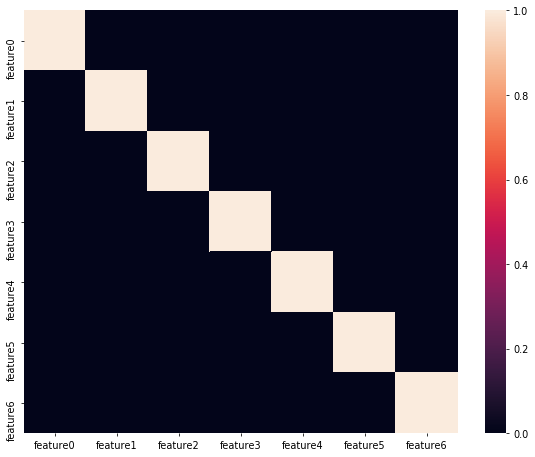

In [200]:
corr= reduced_features.corr()
figure(figsize= (10,8), dpi= 70)
sns.heatmap(corr)

In [201]:
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(n_estimators= 300)

In [202]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(reduced_features, target,
                                                   test_size= 0.4,
                                                   random_state= 20)

In [203]:
rfr.fit(x_train, y_train)
yHat=rfr.predict(x_test)

In [204]:
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [205]:
print('RMSLE:', rmsle(yHat, y_test))

RMSLE: 0.1645302162309419


In [206]:
from sklearn.metrics import mean_squared_error

print('RMSE:', np.sqrt(mean_squared_error(yHat, y_test)))

RMSE: 31341.21718811625


In [207]:
test= pd.read_csv('Data/test.csv')

In [208]:
ret= dc.missingPercent(test)

In [209]:
test_df, dropped= dc.dropFeatures(test, 80.00)

In [210]:
dropped

{'MSZoning': 0.2741603838245374,
 'LotFrontage': 15.558601782042494,
 'Utilities': 0.1370801919122687,
 'Exterior1st': 0.06854009595613435,
 'Exterior2nd': 0.06854009595613435,
 'MasVnrType': 1.0966415352981496,
 'MasVnrArea': 1.0281014393420151,
 'BsmtQual': 3.015764222069911,
 'BsmtCond': 3.0843043180260454,
 'BsmtExposure': 3.015764222069911,
 'BsmtFinType1': 2.878684030157642,
 'BsmtFinSF1': 0.06854009595613435,
 'BsmtFinType2': 2.878684030157642,
 'BsmtFinSF2': 0.06854009595613435,
 'BsmtUnfSF': 0.06854009595613435,
 'TotalBsmtSF': 0.06854009595613435,
 'BsmtFullBath': 0.1370801919122687,
 'BsmtHalfBath': 0.1370801919122687,
 'KitchenQual': 0.06854009595613435,
 'Functional': 0.1370801919122687,
 'FireplaceQu': 50.03427004797807,
 'GarageType': 5.20904729266621,
 'GarageYrBlt': 5.346127484578479,
 'GarageFinish': 5.346127484578479,
 'GarageCars': 0.06854009595613435,
 'GarageArea': 0.06854009595613435,
 'GarageQual': 5.346127484578479,
 'GarageCond': 5.346127484578479,
 'SaleType'

In [211]:
cols= dropped.keys()
missing_Obj= test_df[cols].select_dtypes(include= 'object')
missing_Num= test_df[cols].select_dtypes(include= 'float')

In [212]:
test_df[missing_Num.columns]= test_df[missing_Num.columns].fillna(test_df[missing_Num.columns].mean())
test_df[missing_Obj.columns]= test_df[missing_Obj.columns].fillna('NONE')

In [213]:
test_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [214]:
obj_Features= test_df.select_dtypes(include= 'object').columns
test_df= pd.get_dummies(test_df,columns= obj_Features) 

In [215]:
test_df.shape

(1459, 278)

In [216]:
features.shape

(1460, 288)

In [217]:
test_features= scaler.fit_transform(test_df)

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [218]:
test_features= pd.DataFrame(test_features, columns= test_df.columns)

In [219]:
pca.fit(test_features)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [220]:
reduced_test= pca.transform(test_features)

In [221]:
cols= ['feature'+str(i) for i in range(reduced_features.shape[1])]
reduced_test= pd.DataFrame(reduced_test, columns= cols)

In [222]:
reduced_test.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6
0,-3.065523,-3.572509,-0.629536,-1.009273,0.188201,1.361754,-1.523755
1,-0.685122,-4.088671,0.702316,2.029099,0.091562,-1.274449,-1.617077
2,2.529737,0.407665,-1.315806,-2.557442,-1.395181,-1.916534,0.156768
3,3.561640,0.759278,-1.292854,-1.420274,-1.618672,-1.769328,0.018420
4,2.829266,-0.080390,-1.032575,-1.474867,2.702946,2.022416,1.312336


In [223]:
rfr.fit(reduced_features, target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [224]:
salePrice= rfr.predict(reduced_test)

In [225]:
submit= pd.DataFrame()

In [226]:
submit['Id']= test_df.Id

In [227]:
submit['SalePrice']= salePrice

In [228]:
submit.head()

,Id,SalePrice
0,1461,138168.583333
1,1462,179437.516667
2,1463,173778.900000
3,1464,210144.060000
4,1465,200220.966667


In [229]:
submit.to_csv('Submit.csv')